<form action="https://nbviewer.jupyter.org/github/prmiles/notebooks/blob/master/pyfod/index.ipynb">
    <input type="submit" value="Return to Index" style="background-color: green; color: white; width: 150px; height: 35px; float: right"/>
</form>

# Riemann-Liouville Fractional Derivative

Author(s): Paul R. Miles, Graham T. Pash | April 17, 2019

The Riemann-Liouville definition for fractional derivative for $\alpha \in [0, 1)$ is
$$
D^\alpha[f(t)] = \frac{1}{\Gamma(1-\alpha)}\frac{d}{dt}\int_{t_0}^{t}\frac{f(s)}{(t-s)^\alpha}ds.
$$
By defining the function
$$
F(t) = \int_{t_0}^{t}\frac{f(s)}{(t-s)^\alpha}ds
$$
we observe that $D^\alpha[f(t)]$ can be approximated as
$$
D^\alpha[f(t)] = \frac{1}{\Gamma(1-\alpha)}\frac{d}{dt}F(t) \approx \frac{1}{\Gamma(1-\alpha)}\frac{F(t_j)-F(t_{j-1})}{t_j - t_{j-1}}.
$$
Therefore, we can approximate this expression by performing two sets of quadrature and using a simple finite-difference step.

For details on how this expression is numerically approximated, users are referred to the following publication(s):
- Miles, P. R., Pash, G. T., Oates, W. S., Smith, R. C. (2018, September). Numerical Techniques to Model Fractional-Order Nonlinear Viscoelasticity in Soft Elastomers. In ASME 2018 Conference on Smart Materials, Adaptive Structures and Intelligent Systems (pp. V001T03A021). American Society of Mechanical Engineers. http://dx.doi.org/10.1115/SMASIS2018-8102
- Atangana A. and Gómez-Aguilar J. (2017) Numerical Approximation of  Riemann-Liouville  Definition  of  Fractional Derivative:  From Riemann-Liouville to Atangana-Baleanu. Numerical Methods for Partial Differential Equations, 34, no. 5 (2018): 1502-1523. https://doi.org/10.1002/num.22195

**Note:** This method is currently limited for problems where the fractional order is $\alpha \in [0,1)$.

# Example:
We consider the function
$$f(t) = \exp(2t)$$

In [1]:
import numpy as np
def f(t):
    return np.exp(2*t)

where $t \in [0, 1]$ and $\alpha = 0.9$.  Using [Mathematica](https://www.wolfram.com/mathematica/), we find that
$$
\frac{1}{\Gamma(1-0.9)}\frac{d}{dt}\int_0^1\frac{\exp(2t)}{(1-s)^{0.9}}ds = 13.8153.
$$
We can approximate this problem using a variety of quadrature methods (the finite difference component is currently fixed).

## Riemann-Sum Quadrature
To begin, let's consider using a Riemann-Sum approach.

In [2]:
from pyfod.fod import riemannliouville as rlou
alpha = 0.9
out = rlou(f=f, alpha=alpha, lower=0, upper=1, quadrature='rs')
print('D^{}[exp(2t)] = {}'.format(alpha, out['fd']))

D^0.9[exp(2t)] = 10.136823151807425


This clearly is a poor approximation of the fractional derivative.  To improve the approximation, we can increase the grid-resolution of the quadrature method.

In [3]:
from time import time

gs = 2**np.arange(3, 11, 1)
exact = 13.8153
fd = []
error = []
runtime = []
nruns = 100
print('Convergence using Riemann-Sum quadrature:')
for n in gs:
    st = time()
    for ii in range(nruns):
        if ii == 0:
            fd.append(rlou(f=f, alpha=0.9, lower=0, upper=1, quadrature='rs', n=n)['fd'])
        else:
            rlou(f=f, alpha=0.9, lower=0, upper=1, quadrature='rs', n=n)
    et = time()
    error.append(np.abs((exact - fd[-1]))/exact)
    runtime.append((et - st)/nruns)
    print('n = {}, D^{}[exp(2t)] = {}'.format(n, alpha, fd[-1]))

# store output
out = dict(rs=dict(gs=gs, fd=np.array(fd), error=np.array(error),
                   runtime=np.array(runtime),
                   plot=dict(marker='s', color='r', linewidth=2,
                            markersize=10, mfc='none',
                            label='Riemann-Sum')))

Convergence using Riemann-Sum quadrature:
n = 8, D^0.9[exp(2t)] = 11.67940196031357
n = 16, D^0.9[exp(2t)] = 12.8411330104365
n = 32, D^0.9[exp(2t)] = 13.365353529588052
n = 64, D^0.9[exp(2t)] = 13.605851334320256
n = 128, D^0.9[exp(2t)] = 13.717137342089496
n = 256, D^0.9[exp(2t)] = 13.768852350828038
n = 512, D^0.9[exp(2t)] = 13.792934004020047
n = 1024, D^0.9[exp(2t)] = 13.804158897646861


## Gauss-Laguerre Quadrature
Next, we consider using Gauss-Laguerre quadrature.  We note that in order to use this quadrature method we must utilize the symbolic toolkit in Python - `sympy`.

In [4]:
import sympy as sp

def fsp(t):
    return sp.exp(2*t)

gs = 2**np.arange(3, 6, 1)
exact = 13.8153
fd = []
error = []
runtime = []
nruns = 10
print('Convergence using Gauss-Laguerre quadrature:')
for deg in gs:
    st = time()
    for ii in range(nruns):
        if ii == 0:
            fd.append(rlou(f=fsp, alpha=0.9, lower=0, upper=1, quadrature='glag',
                           deg=deg, n_digits=60)['fd'])
        else:
            rlou(f=fsp, alpha=0.9, lower=0, upper=1, quadrature='glag',
                       deg=deg, n_digits=60)
    et = time()
    error.append(np.abs((exact - fd[-1]))/exact)
    runtime.append((et - st)/nruns)
    print('deg = {}, D^{}[exp(2t)] = {}'.format(deg, alpha, fd[-1]))

# add to output
out['glag'] = dict(gs=gs, fd=np.array(fd), error=np.array(error),
                   runtime=np.array(runtime),
                  plot=dict(marker='o', color='g', linewidth=2,
                            markersize=10, mfc='none',
                           label='Gauss-Laguerre'))

Convergence using Gauss-Laguerre quadrature:
deg = 8, D^0.9[exp(2t)] = 12.854577688411853
deg = 16, D^0.9[exp(2t)] = 13.769877509241983
deg = 32, D^0.9[exp(2t)] = 13.813886039889926


## Hybrid: Gauss-Legendre, Riemann-Sum

In [5]:
gs = 2**np.arange(3, 10, 1)
ndom = 6
exact = 13.8153
fd = []
error = []
runtime = []
nruns = 100
print('Convergence using Gauss-Legendre, Riemann-Sum quadrature:')
for n in gs:
    st = time()
    for ii in range(nruns):
        if ii == 0:
            fd.append(rlou(f=f, alpha=0.9, lower=0, upper=1, quadrature='glegrs',
                           ndom=ndom, nrs=n, percent=0.95)['fd'])
        else:
            rlou(f=f, alpha=0.9, lower=0, upper=1, quadrature='glegrs',
                           ndom=ndom, nrs=n, percent=0.95)
    et = time()
    error.append(np.abs((exact - fd[-1]))/exact)
    runtime.append((et - st)/nruns)
    print('n = {}, D^{}[exp(2t)] = {}'.format(n, alpha, fd[-1]))

# add to output
out['glegrs'] = dict(gs=gs, fd=np.array(fd), error=np.array(error),
                     runtime=np.array(runtime),
                  plot=dict(marker='d', color='b', linewidth=2,
                            markersize=10, mfc='none',
                            label='Gauss-Legendre,\nRiemann-Sum'))

Convergence using Gauss-Legendre, Riemann-Sum quadrature:
n = 8, D^0.9[exp(2t)] = 13.726787568350915
n = 16, D^0.9[exp(2t)] = 13.77589713304164
n = 32, D^0.9[exp(2t)] = 13.79659778813973
n = 64, D^0.9[exp(2t)] = 13.805796825275051
n = 128, D^0.9[exp(2t)] = 13.809987487023808
n = 256, D^0.9[exp(2t)] = 13.811919671525207
n = 512, D^0.9[exp(2t)] = 13.81281582906238


## Hybrid: Gauss-Legendre, Gauss-Laguerre

In [6]:
def fexp(x):
    try:
        tmp = np.exp(2*x)
    except:
        tmp = sp.exp(2*x)
    return tmp

gs = 2**np.arange(3, 6, 1)
NGLeg = 6
exact = 13.8153
fd = []
error = []
runtime = []
nruns = 10
print('Convergence using Gauss-Legendre (deg = 4), Gauss-Laguerre quadrature:')
for deg in gs:
    st = time()
    for ii in range(nruns):
        if ii == 0:
            fd.append(rlou(f=fexp, alpha=0.9, lower=0, upper=1, quadrature='glegglag',
                           ndom=ndom, glag_deg=deg, n_digits=50, percent=0.95)['fd'])
        else:
            rlou(f=fexp, alpha=0.9, lower=0, upper=1, quadrature='glegglag',
                           ndom=ndom, glag_deg=deg, n_digits=50, percent=0.95)
    et = time()
    error.append(np.abs((exact - fd[-1]))/exact)
    runtime.append((et - st)/nruns)
    print('deg = {}, D^{}[exp(2t)] = {}'.format(deg, alpha, fd[-1]))

# add to output
out['glegglag'] = dict(gs=gs, fd=np.array(fd), error=np.array(error),
                       runtime=np.array(runtime),
                  plot=dict(marker='*', color='k', linewidth=2,
                            markersize=10, mfc='none',
                            label='Gauss-Legendre (deg = 4),\nGauss-Laguerre'))

Convergence using Gauss-Legendre (deg = 4), Gauss-Laguerre quadrature:
deg = 8, D^0.9[exp(2t)] = 13.102586459436592
deg = 16, D^0.9[exp(2t)] = 13.780918301368802
deg = 32, D^0.9[exp(2t)] = 13.813534726216064


## Plot Convergence for All Quadrature Methods
<a id='fig1'></a>
[](#fig1)

<IPython.core.display.Javascript object>


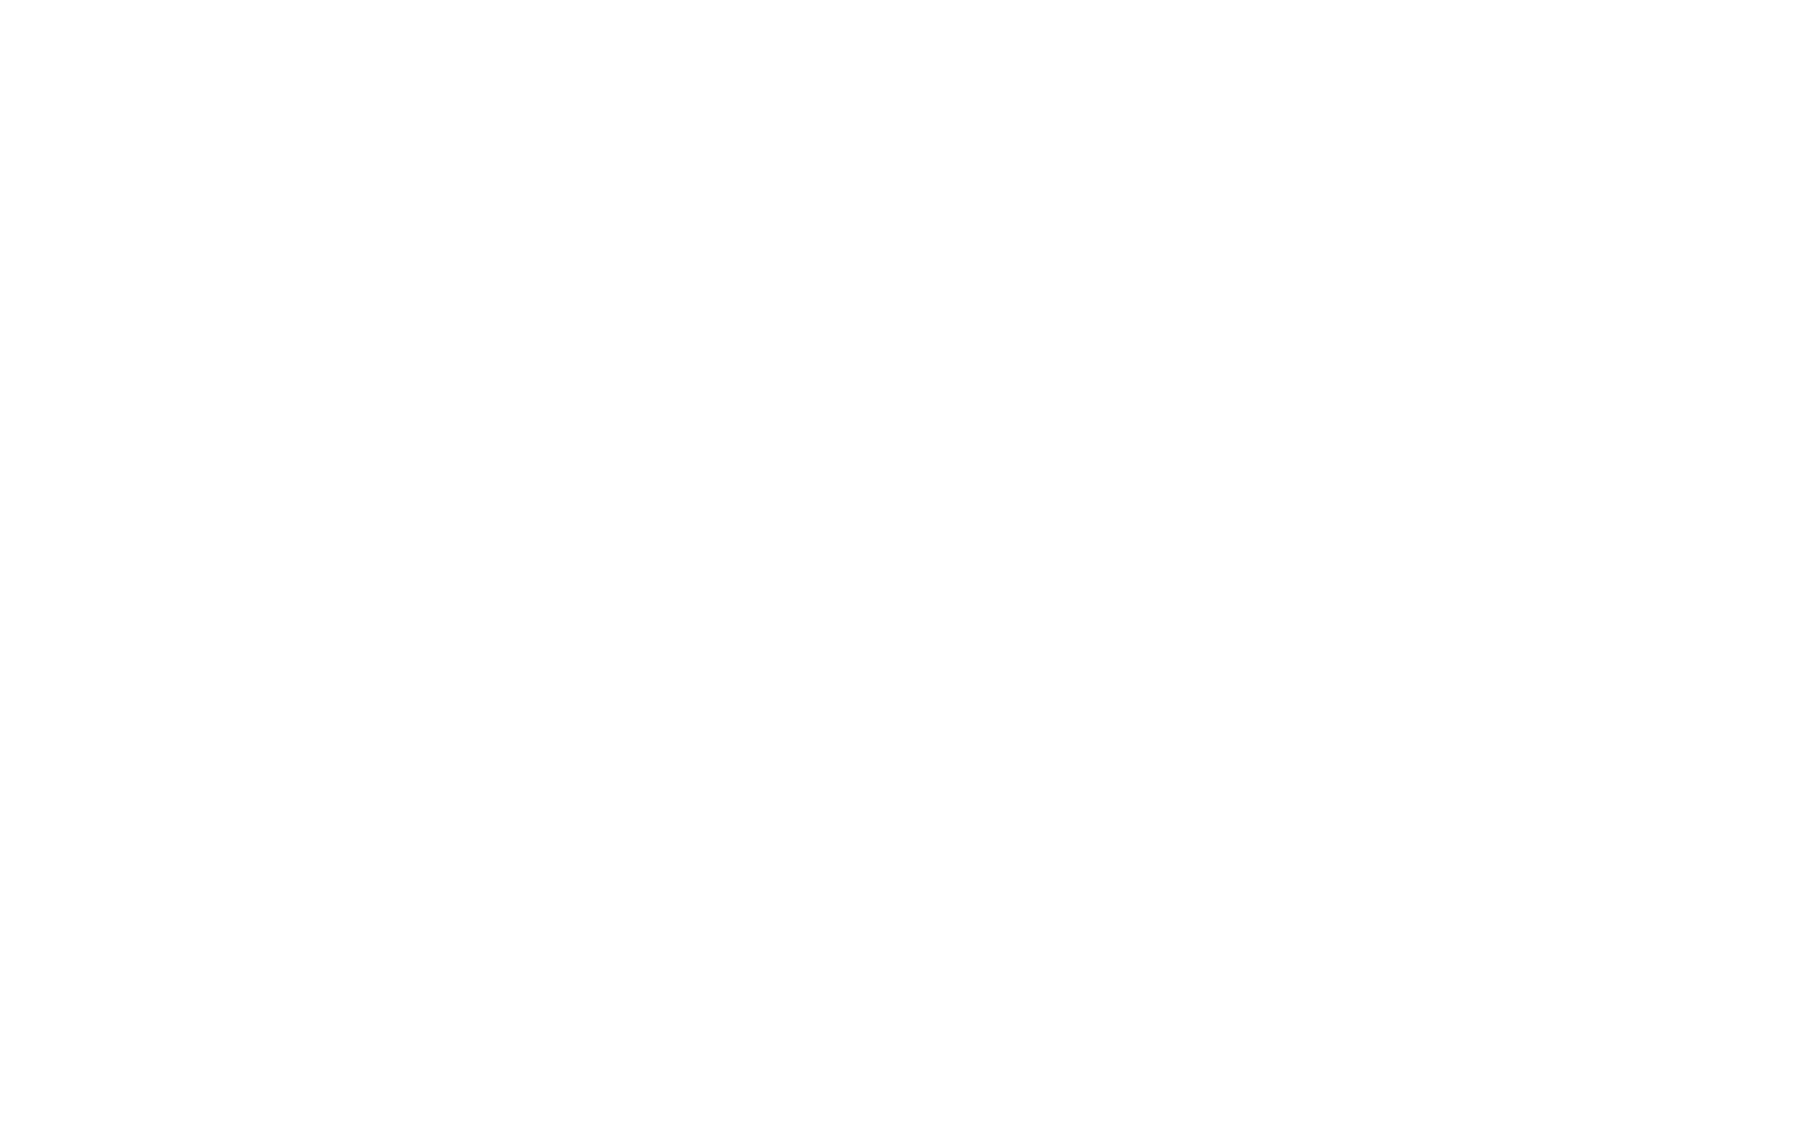

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

sns.set_context('talk')
plt.figure(figsize=(8,5))
for qm in out:
    plt.loglog(out[qm]['gs'], out[qm]['error'], **out[qm]['plot'])
plt.xlabel('log(N)')
plt.ylabel('log(error)')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left", fontsize=10)
plt.tight_layout()

**Discussion:** The convergence trends appear to be approximately linear in loglog space, which is not surprising.  Utilizing the hybrid quadruture approach with Gauss-Legendre and Riemann-Sum enables you to focus more of your computational budget in the region near the singularity.  Depending on the accuracy requirements of your particular problem, using just a few Riemann-Sum terms near the singularity can provide reasonable results.

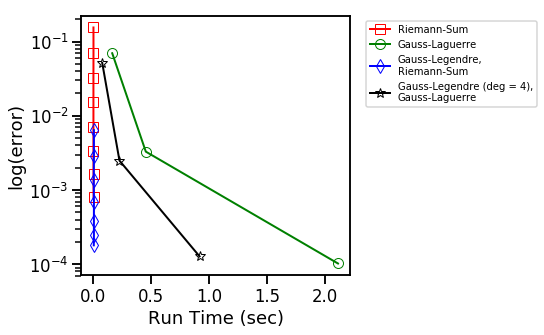

In [8]:
sns.set_context('talk')
plt.figure(figsize=(8,5))
for qm in out:
    plt.semilogy(out[qm]['runtime'], out[qm]['error'], **out[qm]['plot'])
plt.xlabel('Run Time (sec)')
plt.ylabel('log(error)')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left", fontsize=10)
plt.tight_layout()

**Discussion:** The run time requirements for the methods that use Gauss-Laguerre are significantly larger.  This is because the method requires the use of symbolic expressions and extended precision.  That said, you can achieve extremely accurate results with relatively few terms as seen in the [previous figure](#fig1).